In [35]:
import scanpy as sc
import pandas as pd
import scvi
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
adata=sc.read_csv('/data2/ZenNa/DFU_Project/Data/Footskin/GSM5050522_Diabetic.csv').T
adata

AnnData object with n_obs × n_vars = 985 × 14364

In [37]:
pwd

'/data2/ZenNa/DFU_Project/Code'

In [38]:
adata.obs

""
AAACCTGCATGTAAGA
AAACCTGGTGTGACGA
AAACGGGAGGCTACGA
AAACGGGTCTTGTTTG
AAAGATGGTCAGAGGT
...
TTTGGTTAGGGCTTGA
TTTGGTTGTGAGTGAC
TTTGTCAAGATGTCGG
TTTGTCACAAGCCGTC


In [39]:
sc.pp.filter_genes(adata, min_cells = 3)

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [40]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [41]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [42]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train(use_gpu=True)

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scvi/train/_trainrunner.py:76: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  accelerator, lightning_devices, device = parse_device_args(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/lightning/pytorch/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (7) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 400/400: 100%|█| 400/400 [00:17<00:00, 22.36it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:17<00:00, 23.33it/s, v_num=1, train_loss_step


In [43]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 353/400:  88%|▉| 353/400 [00:13<00:01, 25.89it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.304. Signaling Trainer to stop.


In [44]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)
df

,doublet,singlet,prediction
AAACCTGCATGTAAGA,-1.348736,2.168592,singlet
AAACCTGGTGTGACGA,-2.820619,2.438396,singlet
AAACGGGAGGCTACGA,-0.707830,0.229821,singlet
AAACGGGTCTTGTTTG,-0.746796,0.818365,singlet
AAAGATGGTCAGAGGT,-1.645193,0.866078,singlet
...,...,...,...
TTTGGTTAGGGCTTGA,-0.445806,0.202800,singlet
TTTGGTTGTGAGTGAC,-2.962606,3.862343,singlet
TTTGTCAAGATGTCGG,-0.826216,0.580806,singlet
TTTGTCACAAGCCGTC,0.817549,-0.773044,doublet


In [45]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,198,198
singlet,787,787


In [46]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCTGCATGTAAGA,-1.348736,2.168592,singlet,-3.517329
AAACCTGGTGTGACGA,-2.820619,2.438396,singlet,-5.259015
AAACGGGAGGCTACGA,-0.707830,0.229821,singlet,-0.937651
AAACGGGTCTTGTTTG,-0.746796,0.818365,singlet,-1.565161
AAAGATGGTCAGAGGT,-1.645193,0.866078,singlet,-2.511271
...,...,...,...,...
TTTGGTTAGGGCTTGA,-0.445806,0.202800,singlet,-0.648606
TTTGGTTGTGAGTGAC,-2.962606,3.862343,singlet,-6.824949
TTTGTCAAGATGTCGG,-0.826216,0.580806,singlet,-1.407022
TTTGTCACAAGCCGTC,0.817549,-0.773044,doublet,1.590593


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


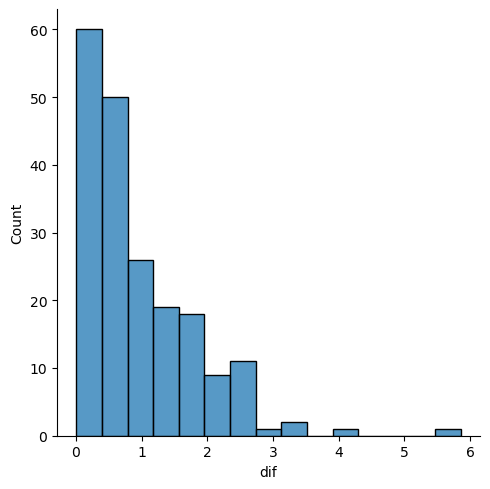

In [47]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [48]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
doublets

,doublet,singlet,prediction,dif
AACCATGCAGTTCCCT,1.163542,-1.205831,doublet,2.369373
AACTCTTAGTCCATAC,0.349097,-1.101866,doublet,1.450963
AACTCTTGTGAGGGAG,0.804939,-1.151227,doublet,1.956166
ACGAGGATCGGCTTGG,1.603971,-0.775785,doublet,2.379756
ACGGGTCAGGTGTGGT,1.073684,-1.343269,doublet,2.416953
...,...,...,...,...
TTCTCCTCACTGAAGG,0.892835,-0.790165,doublet,1.683000
TTGAACGGTTATGTGC,2.283777,-0.978314,doublet,3.262091
TTGACTTAGAATGTTG,0.596701,-1.040335,doublet,1.637036
TTTACTGCAAGTACCT,1.245567,-0.448335,doublet,1.693902


In [49]:
adata

AnnData object with n_obs × n_vars = 985 × 2000
    obs: '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [50]:
adata_reLoad=sc.read_csv('/data2/ZenNa/DFU_Project/Data/Footskin/GSM5050522_Diabetic.csv').T

In [51]:
adata_reLoad.obs['doublet'] = adata.obs.index.isin(doublets.index)

In [52]:
adata_reLoad.obs

,doublet
AAACCTGCATGTAAGA,False
AAACCTGGTGTGACGA,False
AAACGGGAGGCTACGA,False
AAACGGGTCTTGTTTG,False
AAAGATGGTCAGAGGT,False
...,...
TTTGGTTAGGGCTTGA,False
TTTGGTTGTGAGTGAC,False
TTTGTCAAGATGTCGG,False
TTTGTCACAAGCCGTC,True


In [53]:
adata_reMoveDoublet = adata_reLoad[~adata_reLoad.obs.doublet] #the~ mean you keep the False

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [54]:
adata_reLoad

AnnData object with n_obs × n_vars = 985 × 14364
    obs: 'doublet'

In [55]:
adata_reMoveDoublet

View of AnnData object with n_obs × n_vars = 907 × 14364
    obs: 'doublet'

In [56]:
adata_reMoveDoublet

View of AnnData object with n_obs × n_vars = 907 × 14364
    obs: 'doublet'

#Preprocessing

In [57]:
adata_reMoveDoublet.var[adata_reMoveDoublet.var.index.str.startswith('MT-')] #gene name

""
MT-ND1
MT-ND2
MT-CO1
MT-CO2
MT-ATP8
MT-ATP6
MT-CO3
MT-ND3
MT-ND4L
MT-ND4


In [58]:
adata_reMoveDoublet.var['mt'] = adata_reMoveDoublet.var.index.str.startswith('MT-') #mitochondria


/tmp/ipykernel_927275/2620672669.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata_reMoveDoublet.var['mt'] = adata_reMoveDoublet.var.index.str.startswith('MT-') #mitochondria


In [59]:
adata_reMoveDoublet.var

,mt
FO538757.2,False
AP006222.2,False
RP11-206L10.9,False
LINC00115,False
FAM41C,False
...,...
AC145212.4,False
AC011043.1,False
AL592183.1,False
AC007325.4,False


In [60]:
adata_reMoveDoublet.var

,mt
FO538757.2,False
AP006222.2,False
RP11-206L10.9,False
LINC00115,False
FAM41C,False
...,...
AC145212.4,False
AC011043.1,False
AL592183.1,False
AC007325.4,False


In [61]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [62]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [63]:
adata_reMoveDoublet.var['ribo'] = adata_reMoveDoublet.var_names.isin(ribo_genes[0].values)


In [64]:
adata_reMoveDoublet.var

,mt,ribo
FO538757.2,False,False
AP006222.2,False,False
RP11-206L10.9,False,False
LINC00115,False,False
FAM41C,False,False
...,...,...
AC145212.4,False,False
AC011043.1,False,False
AL592183.1,False,False
AC007325.4,False,False


In [65]:
adata_reMoveDoublet.obs

,doublet
AAACCTGCATGTAAGA,False
AAACCTGGTGTGACGA,False
AAACGGGAGGCTACGA,False
AAACGGGTCTTGTTTG,False
AAAGATGGTCAGAGGT,False
...,...
TTTGCGCTCCTAGTGA,False
TTTGGTTAGGGCTTGA,False
TTTGGTTGTGAGTGAC,False
TTTGTCAAGATGTCGG,False


In [66]:
sc.pp.calculate_qc_metrics(adata_reMoveDoublet, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True) #callacular qc matrix


In [67]:
adata_reMoveDoublet.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
CERS3-AS1,False,False,0,0.000000,100.000000,0.0
ASGR2,False,False,1,0.001103,99.889746,1.0
AFF3,False,False,1,0.001103,99.889746,1.0
RP3-324O17.8,False,False,1,0.001103,99.889746,1.0
RP11-97C16.1,False,False,1,0.001103,99.889746,1.0
...,...,...,...,...,...,...
RPL13,False,True,905,13.426682,0.220507,12178.0
B2M,False,False,905,20.595369,0.220507,18680.0
MALAT1,False,False,906,93.403526,0.110254,84717.0
RPL10,False,True,906,21.512680,0.110254,19512.0


In [68]:
adata_reMoveDoublet.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
AAACCTGCATGTAAGA,False,1109,2493.0,138.0,5.535500,575.0,23.064581
AAACCTGGTGTGACGA,False,832,1487.0,52.0,3.496974,297.0,19.973101
AAACGGGAGGCTACGA,False,2730,9072.0,142.0,1.565256,1387.0,15.288800
AAACGGGTCTTGTTTG,False,1501,3134.0,59.0,1.882578,772.0,24.633057
AAAGATGGTCAGAGGT,False,1078,2467.0,30.0,1.216052,523.0,21.199837
...,...,...,...,...,...,...,...
TTTGCGCTCCTAGTGA,False,1006,1939.0,28.0,1.444043,507.0,26.147499
TTTGGTTAGGGCTTGA,False,1329,2816.0,34.0,1.207386,583.0,20.703125
TTTGGTTGTGAGTGAC,False,709,1193.0,24.0,2.011735,199.0,16.680637
TTTGTCAAGATGTCGG,False,1537,3629.0,64.0,1.763571,693.0,19.096170


In [69]:
sc.pp.filter_genes(adata_reMoveDoublet, min_cells=3)

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [70]:
adata_reMoveDoublet.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
AAACCTGCATGTAAGA,False,1109,2493.0,138.0,5.535500,575.0,23.064581
AAACCTGGTGTGACGA,False,832,1487.0,52.0,3.496974,297.0,19.973101
AAACGGGAGGCTACGA,False,2730,9072.0,142.0,1.565256,1387.0,15.288800
AAACGGGTCTTGTTTG,False,1501,3134.0,59.0,1.882578,772.0,24.633057
AAAGATGGTCAGAGGT,False,1078,2467.0,30.0,1.216052,523.0,21.199837
...,...,...,...,...,...,...,...
TTTGCGCTCCTAGTGA,False,1006,1939.0,28.0,1.444043,507.0,26.147499
TTTGGTTAGGGCTTGA,False,1329,2816.0,34.0,1.207386,583.0,20.703125
TTTGGTTGTGAGTGAC,False,709,1193.0,24.0,2.011735,199.0,16.680637
TTTGTCAAGATGTCGG,False,1537,3629.0,64.0,1.763571,693.0,19.096170


In [71]:
adata_reMoveDoublet.var.sort_values('n_cells_by_counts')
# adata_reMoveDoublet.obs.sort_values('pct_counts_ribo')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AC240274.1,False,False,3,0.003308,99.669239,3.0,3
RP11-227G15.8,False,False,3,0.003308,99.669239,3.0,3
RP11-227G15.11,False,False,3,0.003308,99.669239,3.0,3
PCDHGA11,False,False,3,0.003308,99.669239,3.0,3
DHH,False,False,3,0.003308,99.669239,3.0,3
...,...,...,...,...,...,...,...
RPL13,False,True,905,13.426682,0.220507,12178.0,905
B2M,False,False,905,20.595369,0.220507,18680.0,905
RPL10,False,True,906,21.512680,0.110254,19512.0,906
MALAT1,False,False,906,93.403526,0.110254,84717.0,906


In [72]:
adata_reMoveDoublet.obs.sort_values('total_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TCAGGTATCATCGGAT,False,520,956.0,17.0,1.778243,104.0,10.878661
CCTATTACAGCCAGAA,False,556,956.0,13.0,1.359833,196.0,20.502092
CACATTTAGAGCTTCT,False,483,956.0,23.0,2.405858,131.0,13.702929
TTCTACACAGCCTTGG,False,534,957.0,27.0,2.821316,238.0,24.869385
AGGGAGTAGGACAGCT,False,516,958.0,96.0,10.020877,91.0,9.498956
...,...,...,...,...,...,...,...
GTGCGGTCACTTAAGC,False,3350,11050.0,88.0,0.796380,2176.0,19.692308
CATCAGACAGGGATTG,False,3061,11436.0,227.0,1.984960,2871.0,25.104931
GCAAACTGTCGTGGCT,False,3172,12358.0,177.0,1.432271,2402.0,19.436802
TCTTTCCCACGCTTTC,False,3346,12611.0,251.0,1.990326,2041.0,16.184284


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

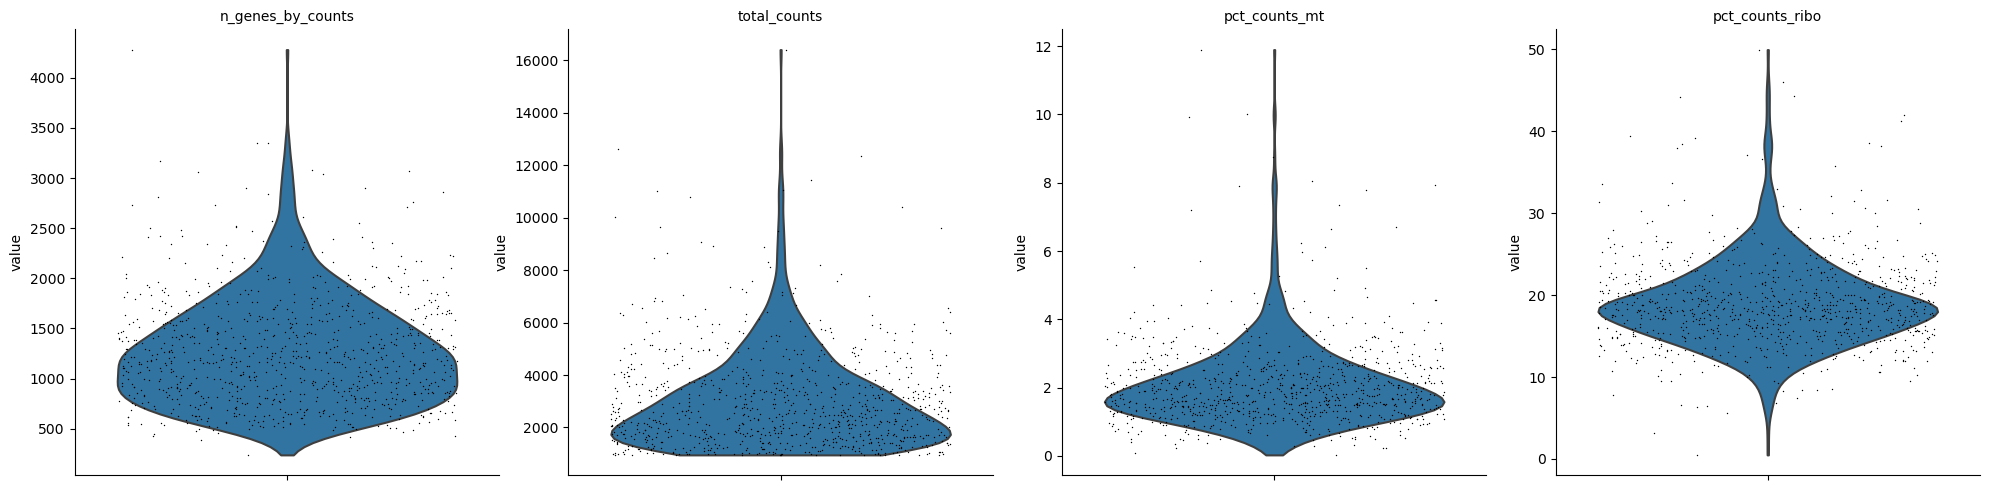

In [73]:
sc.pl.violin(adata_reMoveDoublet, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True) #QC

In [74]:
upper_lim = np.quantile(adata_reMoveDoublet.obs.n_genes_by_counts.values, .98)
#upper_lim = 3000

In [75]:
upper_lim

2571.88

In [76]:
adata_lim = adata_reMoveDoublet[adata_reMoveDoublet.obs.n_genes_by_counts < upper_lim]

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [77]:
adata_lim.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
AAACCTGCATGTAAGA,False,1109,2493.0,138.0,5.535500,575.0,23.064581
AAACCTGGTGTGACGA,False,832,1487.0,52.0,3.496974,297.0,19.973101
AAACGGGTCTTGTTTG,False,1501,3134.0,59.0,1.882578,772.0,24.633057
AAAGATGGTCAGAGGT,False,1078,2467.0,30.0,1.216052,523.0,21.199837
AAAGATGGTCCAAGTT,False,1648,3816.0,55.0,1.441300,500.0,13.102725
...,...,...,...,...,...,...,...
TTTGCGCTCCTAGTGA,False,1006,1939.0,28.0,1.444043,507.0,26.147499
TTTGGTTAGGGCTTGA,False,1329,2816.0,34.0,1.207386,583.0,20.703125
TTTGGTTGTGAGTGAC,False,709,1193.0,24.0,2.011735,199.0,16.680637
TTTGTCAAGATGTCGG,False,1537,3629.0,64.0,1.763571,693.0,19.096170


In [78]:
adata_mt_filter_20 = adata_lim[adata_lim.obs.pct_counts_mt < 20]

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


#Normalize

In [79]:
adata_mt_filter_20.X.sum(axis=1)

array([2493., 1486., 3131., 2466., 3815., 3868., 3654., 1740., 1253.,
       2130., 6707., 2303.,  959., 3277., 3470., 1270., 3483., 1815.,
       3358., 3307., 4237., 1768., 1432., 5615., 2648.,  989., 3431.,
        995., 3263., 4573., 5542., 1021., 6079., 1568., 1781., 1916.,
       1630., 1710., 2809., 1428., 2462., 5721., 2552., 2367., 1896.,
       7316., 2276., 2370., 2269., 3593., 1243., 2974., 1407., 5379.,
       4089., 1100., 2869., 4314., 2051., 1704., 2614., 1969., 2731.,
       3386., 1632., 2621., 3746.,  999., 1377., 3046., 1115., 1223.,
       5601., 2330.,  964., 1412., 1440., 2122., 1935., 1014., 6806.,
       1500., 1255., 1211., 1683., 3007., 1714., 7060., 1012., 2837.,
       4565., 1093., 2630., 1347., 1053., 2350., 2446., 1270., 1710.,
       2707., 4998., 1073., 1007., 2159., 3180., 5608., 3260., 1495.,
       1709., 1658., 5986., 3757., 3530., 2120., 1602., 1173., 2676.,
       2494., 2159., 2508., 2577.,  961., 4326., 3367., 1861., 1763.,
       1531., 3144.,

In [80]:
sc.pp.normalize_total(adata_mt_filter_20, target_sum=1e4) #normalize every cell to 10,000 UMI

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [81]:
adata_mt_filter_20.X.sum(axis = 1)

array([10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.001, 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   ,  9999.999,  9999.999, 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   ,  9999.999, 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.001, 10000.001, 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.001, 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.001,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,  9999.999,
       10000.   , 10000.   , 10000.   , 10000.   , 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   ,  9999.999, 10000.   , 10000.   ,
       10000.   , 10000.   , 10000.   , 10000.   , 

In [82]:
sc.pp.log1p(adata_mt_filter_20) #change to log counts

In [83]:
adata_mt_filter_20.X.sum(axis = 1)

array([2168.9329 , 1940.8333 , 2611.372  , 2089.6099 , 2679.9497 ,
       2632.1973 , 2705.8389 , 2080.3982 , 1708.2314 , 2193.     ,
       2966.4844 , 2039.5693 , 1212.4568 , 2486.9307 , 2428.887  ,
       1738.3214 , 2477.2988 , 2192.6396 , 2532.962  , 2441.7517 ,
       2557.3872 , 2090.3481 , 1769.5714 , 2662.0396 , 2385.7195 ,
       1395.2593 , 2492.918  , 1684.825  , 2455.0093 , 2601.755  ,
       2693.7852 , 1661.1577 , 2924.838  , 1732.0862 , 1829.0122 ,
       2066.2437 , 1846.0665 , 1879.755  , 2302.1187 , 1886.084  ,
       2230.0122 , 3042.5217 , 2419.6152 , 1946.2308 , 1660.5032 ,
       3121.859  , 2305.4492 , 2005.5879 , 2362.4097 , 2615.8357 ,
       1497.7537 , 2502.9524 , 1759.0015 , 2730.2114 , 2662.2627 ,
       1453.3477 , 2324.933  , 2417.675  , 2096.768  , 1731.2864 ,
       2491.3486 , 1850.4836 , 2428.1357 , 2276.7769 , 1843.7255 ,
       2255.4512 , 2405.8032 , 1345.1345 , 1668.8943 , 2535.8384 ,
       1296.7468 , 1738.2708 , 2614.7754 , 2287.6616 , 1674.19

In [84]:
adata_raw = adata_mt_filter_20

#Clustering


In [85]:
sc.pp.highly_variable_genes(adata_raw, n_top_genes = 2000)


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [86]:
adata_raw.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
FO538757.2,False,False,31,0.035281,96.582139,32.0,31,False,0.127594,1.580912,0.077909
AP006222.2,False,False,54,0.065050,94.046307,59.0,54,False,0.167203,1.574600,0.057828
RP11-206L10.9,False,False,9,0.009923,99.007718,9.0,9,False,0.036360,1.446015,-0.351286
LINC00115,False,False,5,0.005513,99.448732,5.0,5,True,0.023670,1.813175,0.816895
FAM41C,False,False,12,0.015436,98.676957,14.0,12,False,0.036749,1.344087,-0.675587
...,...,...,...,...,...,...,...,...,...,...,...
AC145212.4,False,False,3,0.003308,99.669239,3.0,3,False,0.010568,1.331752,-0.714833
AC011043.1,False,False,20,0.023153,97.794928,21.0,20,False,0.070031,1.494305,-0.197645
AL592183.1,False,False,9,0.009923,99.007718,9.0,9,False,0.037559,1.464225,-0.293349
AC007325.4,False,False,21,0.024256,97.684675,22.0,21,False,0.068897,1.314251,-0.770517


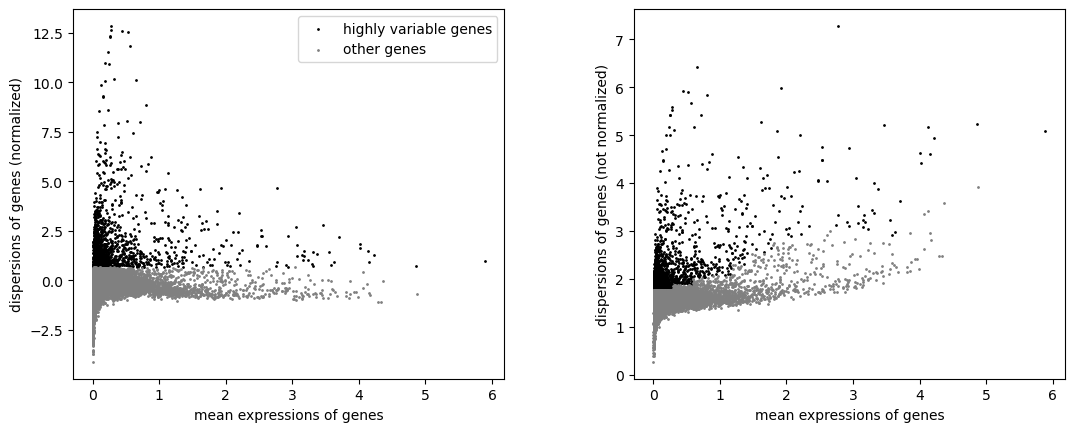

In [87]:
sc.pl.highly_variable_genes(adata_raw)

In [88]:
adata_top_gene = adata_raw[:, adata_raw.var.highly_variable]

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [89]:
sc.pp.regress_out(adata_top_gene, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:619: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if keys[0] in adata.obs_keys() and is_categorical_dtype(adata.obs[keys[0]]):


In [90]:
sc.pp.scale(adata_top_gene, max_value=10)


In [91]:
sc.tl.pca(adata_top_gene, svd_solver='arpack')


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


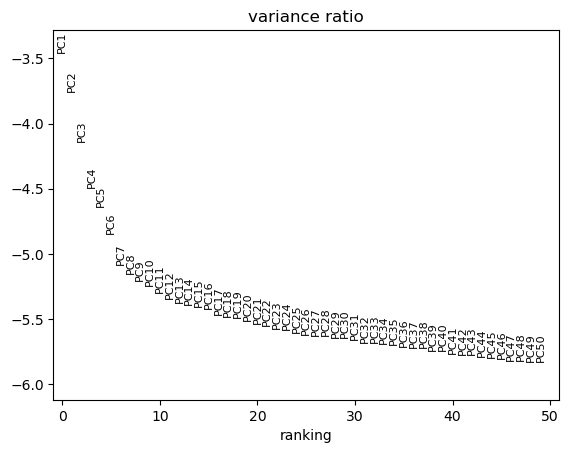

In [92]:
sc.pl.pca_variance_ratio(adata_top_gene, log=True, n_pcs = 50)


In [93]:
sc.pp.neighbors(adata_top_gene, n_pcs = 30)

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/uma

In [94]:
adata_top_gene.obsp['distances'].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
sc.tl.umap(adata_top_gene)

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


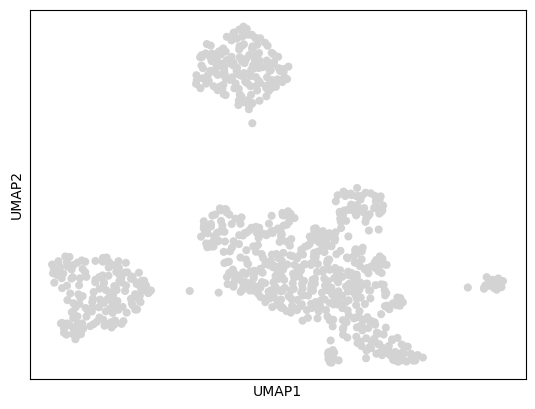

In [96]:
sc.pl.umap(adata_top_gene)

In [97]:
sc.tl.leiden(adata_top_gene, resolution = 0.5)

In [98]:
adata_top_gene.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
AAACCTGCATGTAAGA,False,1109,2493.0,138.0,5.535500,575.0,23.064581,2
AAACCTGGTGTGACGA,False,832,1487.0,52.0,3.496974,297.0,19.973101,1
AAACGGGTCTTGTTTG,False,1501,3134.0,59.0,1.882578,772.0,24.633057,1
AAAGATGGTCAGAGGT,False,1078,2467.0,30.0,1.216052,523.0,21.199837,3
AAAGATGGTCCAAGTT,False,1648,3816.0,55.0,1.441300,500.0,13.102725,6
...,...,...,...,...,...,...,...,...
TTTGCGCTCCTAGTGA,False,1006,1939.0,28.0,1.444043,507.0,26.147499,2
TTTGGTTAGGGCTTGA,False,1329,2816.0,34.0,1.207386,583.0,20.703125,3
TTTGGTTGTGAGTGAC,False,709,1193.0,24.0,2.011735,199.0,16.680637,2
TTTGTCAAGATGTCGG,False,1537,3629.0,64.0,1.763571,693.0,19.096170,7


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


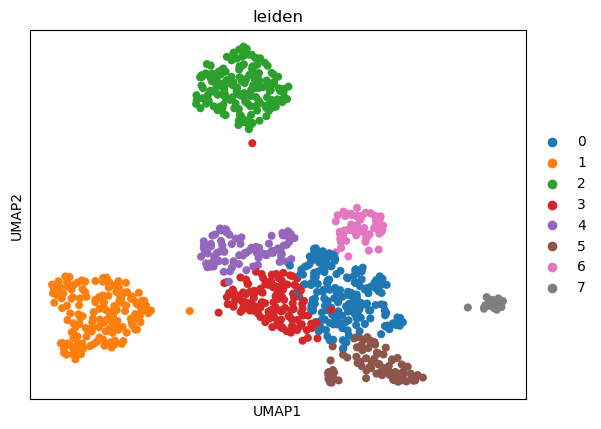

In [99]:
sc.pl.umap(adata_top_gene,color=['leiden'])

In [100]:
def extract_name(filePath):
    filename = os.path.basename(filePath)
    status = filename.split('_')[-1].split('.')[0]
    return status

In [101]:
def extract_name_index(filePath):
    # Get the file name without extension
    filename = os.path.splitext(os.path.basename(filePath))[0]
    # Split the filename by underscore and return the last part
    parts = filename.split('_')
    return parts[-2] + "_" + parts[-1]

In [102]:
def pp(csv_path):
    new_adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(new_adata, min_cells = 10)
    sc.pp.highly_variable_genes(new_adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(new_adata)
    vae = scvi.model.SCVI(new_adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    
    new_adata = sc.read_csv(csv_path).T
    new_adata.obs['Sample'] = extract_name_index(csv_path) # csv_path.split('_')[2] #'raw_counts/GSM5226574_Diabetes_raw_counts.csv'
    
    new_adata.obs['doublet'] = new_adata.obs.index.isin(doublets.index)
    new_adata = new_adata[~new_adata.obs.doublet]
    
    
    sc.pp.filter_cells(new_adata, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(new_adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    new_adata.var['mt'] = new_adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    new_adata.var['ribo'] = new_adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(new_adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(new_adata.obs.n_genes_by_counts.values, .98)
    new_adata = new_adata[new_adata.obs.n_genes_by_counts < upper_lim]
    new_adata = new_adata[new_adata.obs.pct_counts_mt < 20]

    return new_adata

In [103]:
import os

In [ ]:
out = []
file_path = '/data2/ZenNa/DFU_Project/Data/Footskin/'
for file in os.listdir(file_path):
    out.append(pp(file_path + file))

/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/lightning/pytorch/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (8) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value fo

Epoch 400/400: 100%|█| 400/400 [00:22<00:00, 18.86it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:22<00:00, 17.85it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 307/400:  77%|▊| 307/400 [00:13<00:04, 22.37it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.410. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:23<00:00,  4.85it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:23<00:00,  4.79it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|█| 400/400 [01:08<00:00,  5.93it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:08<00:00,  5.88it/s, v_num=1, train_loss_step


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [01:21<00:00,  4.95it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [01:21<00:00,  4.91it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 317/400:  79%|▊| 317/400 [00:52<00:13,  6.09it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.226. Signaling Trainer to stop.


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:139: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Epoch 400/400: 100%|█| 400/400 [00:52<00:00,  7.74it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [00:52<00:00,  7.57it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


/data1/tools/anaconda3/envs/zennaenv/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 344/400:  86%|▊| 344/400 [00:35<00:05,  9.71it/s, v_num=1, train_loss_step

In [ ]:
out [0]
adata_integrate = sc.concat(out)
sc.pp.filter_genes(adata_integrate, min_cells = 10)
adata_integrate.X
from scipy.sparse import csr_matrix


In [ ]:
adata_integrate.X = csr_matrix(adata_integrate.X)

In [ ]:
adata_integrate.X

In [ ]:
adata_integrate.write_h5ad('combined.h5ad')

In [ ]:
adata_integrate = sc.read_h5ad('combined.h5ad')

In [ ]:
adata_integrate.obs.groupby('Sample').count()

In [ ]:
sc.pp.filter_genes(adata_integrate, min_cells = 100)

In [ ]:
adata_integrate

In [ ]:
adata_integrate.layers['counts'] = adata_integrate.X.copy()

In [ ]:
sc.pp.normalize_total(adata_integrate, target_sum = 1e4)
sc.pp.log1p(adata_integrate)
adata_integrate.raw = adata_integrate

In [ ]:
adata_integrate.obs.head()

In [ ]:
adata_integrate

In [ ]:
sc.pp.normalize_total(adata_integrate, target_sum = 1e4)
sc.pp.log1p(adata_integrate)
adata_integrate_raw = adata_integrate

In [ ]:
adata_integrate_raw.obs.head()

In [ ]:
scvi.model.SCVI.setup_anndata(adata_integrate_raw, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

model = scvi.model.SCVI(adata_integrate_raw)


In [ ]:
model.train() #may take a while without GPU

In [ ]:
## save model after training finish
dir_path2 = '/data2/ZenNa/DFU_Project/Code/Model' 
model.save(dir_path,overwrite=True)
adata_integrate_raw.write_h5ad('adata_integrate_raw.h5ad')

In [ ]:
adata_integrate_raw.obsm['X_scVI'] = model.get_latent_representation()

In [ ]:
adata_integrate_raw.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [ ]:
sc.pp.neighbors(adata_integrate_raw, use_rep = 'X_scVI')

In [ ]:
sc.tl.umap(adata_integrate_raw)
sc.tl.leiden(adata_integrate_raw, resolution = 0.2)

In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['leiden', 'Sample'], frameon = False)

In [ ]:
sc.tl.rank_genes_groups(adata_integrate_raw, 'leiden')

In [ ]:
markers = sc.get.rank_genes_groups_df(adata_integrate_raw, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

In [ ]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

In [ ]:
markers_scvi_filled = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]
markers_scvi_filled

In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['leiden'], frameon = False, legend_loc = "on data")

In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['PECAM1', 'ACKR1'], frameon = False, layer = 'scvi_normalized', vmax = 5) #Vascular epithelial


In [ ]:
markers[markers.names == 'PECAM1']

In [ ]:
markers[markers.names == 'ACKR1']


In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['CD68', 'CSF1R'], frameon = False, layer = 'scvi_normalized', vmax = 5) #M2 macrophage-6
sc.pl.umap(adata_integrate_raw, color = ['CD86', 'IL1B', 'IL6','TLR4'], frameon = False, layer = 'scvi_normalized', vmax = 5) #M1 macrophage



In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['COL6A2', 'LUM','PDGFRB'], frameon = False, layer = 'scvi_normalized', vmax = 30)  #Fibroblast 0 4


In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['TRBC2', 'CD3D'], frameon = False, layer = 'scvi_normalized', vmax = 5) #Tcell 


In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['DCN','CFD'], frameon = False, layer = 'scvi_normalized', vmax = 20) #Fibrobast

In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['LTC4S'], frameon = False, layer = 'scvi_normalized', vmax = 5) #Mastcell


In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['ACTA2','TAGLN','MYL9'], frameon = False, layer = 'scvi_normalized', vmax = 20) #SMC

In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['KRT5'], frameon = False, layer = 'scvi_normalized', vmax = 5) #BasalKera

In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['MITF','RAB38'], frameon = False, layer = 'scvi_normalized', vmax = 5) #Melanocytes

In [ ]:
sc.pl.umap(adata_integrate_raw, color = ['IGKC'], frameon = False, layer = 'scvi_normalized', vmax = 30) #erythroid-like 

In [ ]:
cell_type = {"0":"Fibroblast",
"1":"SMC",
"2":"Basalkera",
"3":"VasEpithelial",
"4":"Macrophage",
"5":"Tcell",
"6":"Basalkera",
"7":"Mastcell",
"8":"Melanocytes",
"9":"VasEpithelial",
"10":"Erythroid-like",
            }

In [ ]:
adata_integrate_raw.obs['cell type'] = adata_integrate_raw.obs.leiden.map(cell_type)
sc.pl.umap(adata_integrate_raw, color = ['cell type'], frameon = False)


In [ ]:
adata_integrate_raw

In [ ]:
adata_integrate_raw.obs.Sample.unique().tolist()


#Counting cell

In [ ]:
def map_condition(x):
    if 'Healthy' in x:
        return 'Healthy'
    elif 'Diabetic' in x:
        return 'Diabetic'
    elif 'DFU- healer' in x:
        return 'DFU- healer'
    else:
        return 'DFU-non healer'

In [ ]:
adata_integrate_raw.obs['condition'] = adata_integrate_raw.obs.Sample.map(map_condition)
print(adata_integrate_raw.obs)

In [ ]:
num_tot_cells = adata_integrate_raw.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

In [ ]:
cell_type_counts = adata_integrate_raw.obs.groupby(['Sample', 'condition', 'cell type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,4))

ax = sns.boxplot(data = cell_type_counts, x = 'cell type', y = 'frequency', hue = 'condition')

plt.xticks(rotation = 45, rotation_mode = 'anchor', ha = 'right')

plt.show()

In [ ]:
subset = adata_integrate_raw[adata_integrate_raw.obs['cell type'].isin(['Fibroblast'])].copy()


# Extract DFU-Healer, DFU-Non-Healer 

In [ ]:
group_column = 'condition'
groups_to_extract = ['DFU- healer', 'DFU-non healer']
filter_adata_integrate_raw = adata_integrate_raw[adata_integrate_raw.obs['condition'].isin(groups_to_extract)]
print(filter_adata_integrate_raw.obs)

# Extract Fibroblast

In [ ]:
subset_cell_Fibroblast = filter_adata_integrate_raw[filter_adata_integrate_raw.obs['cell type'].isin(['Fibroblast'])].copy()

In [ ]:
subset_cell_Fibroblast.obs

In [ ]:
import diffxpy.api as de

In [ ]:
sc.pp.filter_genes(subset_cell_Fibroblast, min_cells=100)
len(subset_cell_Fibroblast.var)


In [ ]:
subset_cell_Macrophage = filter_adata_integrate_raw[filter_adata_integrate_raw.obs['cell type'].isin(['Macrophage'])].copy()